In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
data_dir="/content/drive/MyDrive/ML_Project/ML_DF.csv"
naiive_df= pd.read_csv(data_dir)
naiive_df

,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,rate_type_Nassau or Westchester,rate_type_Negotiated fare,rate_type_Newark,rate_type_Standard rate,trip_type_Street-hail,refund_neg_duplicated_True,trip_price,trip_duration,Day,Hour
0,225,220,1,0.00,2.5,0.5,999.0,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,22.0,1,0
1,43,43,1,0.81,4.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,187.0,1,1
2,79,61,1,4.97,18.0,0.5,0.5,3.86,0.0,0.3,...,0,0,0,1,1,0,high,1139.0,1,0
3,160,189,1,0.83,5.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,242.0,1,1
4,112,117,1,4.99,16.0,0.5,0.5,2.00,0.0,0.3,...,0,0,0,1,1,0,high,999.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913212,37,164,1,1.39,8.0,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,595.0,31,23
913213,139,108,1,2.51,11.0,0.5,0.5,1.70,0.0,0.3,...,0,0,0,1,1,0,medium,814.0,31,23
913214,105,138,1,1.00,6.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,367.0,31,0
913215,105,21,1,2.18,10.0,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,637.0,31,23


In [ ]:
naiive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913217 entries, 0 to 913216
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   pu_location                      913217 non-null  int64  
 1   do_location                      913217 non-null  int64  
 2   passenger_count                  913217 non-null  int64  
 3   trip_distance                    913217 non-null  float64
 4   fare_amount                      913217 non-null  float64
 5   extra                            913217 non-null  float64
 6   mta_tax                          913217 non-null  float64
 7   tip_amount                       913217 non-null  float64
 8   tolls_amount                     913217 non-null  float64
 9   improvement_surcharge            913217 non-null  float64
 10  payment_type                     913217 non-null  int64  
 11  week_number                      913217 non-null  int64  
 12  ra

### Naive Bayes models in scikit-learn cannot handle mixed data types directly.Since the Naive Bayes assumes that the features are independent of each other, we can divide the discrete and continuous features and train two separate Naive Bayes models, one for the discrete features and the other for the continuous features, then combine them together for the final prediction.

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X = naiive_df.drop(columns=['trip_price'])
y = naiive_df['trip_price']

#Random Resampling
X_shuffle, y_shuffle = shuffle(X, y, random_state=42)

# Define the sizes for train(80%) and test(20%) sets
train_size = 0.8
test_size = 0.2

#Split the shuffled dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_shuffle, y_shuffle, test_size=test_size, random_state=42)

#Since the naive bayes Divide the discrete and continuous features
discrete_columns = ['pu_location', 'do_location', 'passenger_count','payment_type', 'week_number', 'rate_type_JFK', 'rate_type_Nassau or Westchester', 'rate_type_Negotiated fare', 'rate_type_Newark', 'rate_type_Standard rate', 'trip_type_Street-hail', 'refund_neg_duplicated_True', 'Day', 'Hour']
continuous_columns = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'trip_duration']

#Create discrete and continuous datasets for training data
X_train_discrete = X_train[discrete_columns]
X_train_continuous = X_train[continuous_columns]

#Create discrete and continuous datasets for test data
X_test_discrete = X_test[discrete_columns]
X_test_continuous = X_test[continuous_columns]

### First, we will create and train a Naive Bayes classifier for the continuous dataset

In [ ]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

#Initialize Gaussian Naive Bayes model for continuous features
gnb = GaussianNB()

#Fit the Gaussian Naive Bayes model on continuous training data
gnb.fit(X_train_continuous, y_train)

#Predict the target labels for continuous test data
y_prob_continuous = gnb.predict_proba(X_test_continuous)

print(y_prob_continuous)

[[1.40686614e-05 1.44034639e-08 9.99985917e-01]
 [1.47401200e-05 1.99592200e-08 9.99985240e-01]
 [9.99606573e-01 3.93426852e-04 1.65762361e-12]
 ...
 [9.05779605e-06 2.26191417e-08 9.99990920e-01]
 [3.90139152e-04 7.18581425e-08 9.99609789e-01]
 [1.11435371e-04 2.78296269e-08 9.99888537e-01]]


### Then, we will do the same for the discrete dataset

In [ ]:
# Initialize Categorical Naive Bayes model for discrete features
cnb = CategoricalNB()

# Fit the Categorical Naive Bayes model on discrete training data
cnb.fit(X_train_discrete, y_train)

# Predict the target labels for discrete test data
y_prob_discrete = cnb.predict_proba(X_test_discrete)
print(y_prob_discrete)

[[0.07483858 0.00458379 0.92057763]
 [0.0703891  0.0025397  0.92707119]
 [0.42671962 0.0369493  0.53633108]
 ...
 [0.07965295 0.00673814 0.91360891]
 [0.08229266 0.0043482  0.91335915]
 [0.01993956 0.00225576 0.97780468]]


### We will combine both predictions by multiply the probabilities together(since the features are assumed to be independent) and get the predicted class for each datapoint.

In [ ]:
from sklearn.metrics import accuracy_score
combined_prob = y_prob_continuous * y_prob_discrete

#Normalize the combined probabilities
combined_prob = combined_prob / combined_prob.sum(axis=1, keepdims=True)
print(combined_prob)

#Predict the class with the highest combined probability
y_pred_combined = np.argmax(combined_prob, axis=1)

class_mapping = {0: 'high', 1: 'low', 2: 'medium'}

#Map the predicted class indices to their corresponding labels
y_pred_encoded = [class_mapping[pred_class] for pred_class in y_pred_combined]

# Print the encoded predictions
print("Encoded Predictions:", y_pred_encoded)

# Calculate the total accuracy
total_accuracy = accuracy_score(y_test, y_pred_encoded)
print("Total Accuracy for combined features:", total_accuracy)

[[1.14373003e-06 7.17193990e-11 9.99998856e-01]
 [1.11917830e-06 5.46788630e-11 9.99998881e-01]
 [9.99965921e-01 3.40787555e-05 2.08416632e-12]
 ...
 [7.89710090e-07 1.66824365e-10 9.99999210e-01]
 [3.51635947e-05 3.42214086e-10 9.99964836e-01]
 [2.27265765e-06 6.42089722e-11 9.99997727e-01]]
Encoded Predictions: ['medium', 'medium', 'high', 'medium', 'high', 'medium', 'medium', 'medium', 'high', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'high', 'high', 'medium', 'high', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'high', 'medium', 'high', 'medium', 'medium', 'medium', 'high', 'high', 'medium', 'medium', 'medium', 'medium', 'medium', 'high', 'medium', 'low', 'medium', 'medium', 'medium', 'medium', 'medium', 'high', 'medium', 'medium', 'medium', 'medium', 'medium', 'high', 'medium', 'medium', 'medium', 'medium', 'high', 'medium', 'high', 'medium', 'medium', 'medium', 'low', 'medium', 'medium', 'medium', 'medium', 'medium', 

### Final Accuracy= 0.932935

### To observe how did the classifier work, we will print the confusion matrix and the classification report

Confusion Matrix:
[[ 34725   1807   6631]
 [  1522   5454      0]
 [  1855    434 130216]]


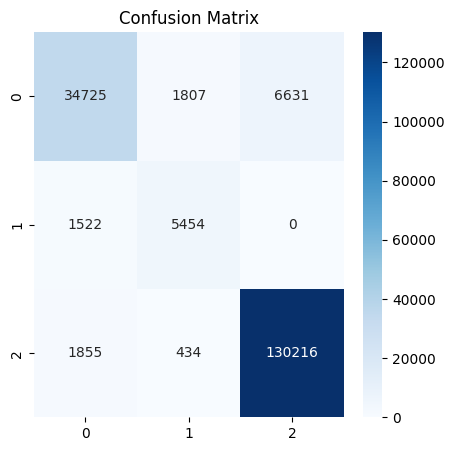

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_encoded)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Calculate the classification report
class_report = classification_report(y_test, y_pred_encoded)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

        high       0.91      0.80      0.85     43163
         low       0.71      0.78      0.74      6976
      medium       0.95      0.98      0.97    132505

    accuracy                           0.93    182644
   macro avg       0.86      0.86      0.86    182644
weighted avg       0.93      0.93      0.93    182644



### The "medium class" dominates the other two classes, having the highest precision.

### It can also be observed that the precision is the lowest at the "low" class. This could happen due to that there are lower datapoints labeled as "low" in our train set itself. So, one way to overcome this is to let the model see more datapoints labeled as "low"

### Also, the recall value at the "high" and "low" classes are considered low, with respect to the "medium" class. This means that the model "correctly" predicted 80% of all the "high" labels, 78% of all the "low" labels, and 98% of all the "medium" labels. This tells us that the model still needs to see more data of the "high" and "low" labels to be able to increase their recall values.